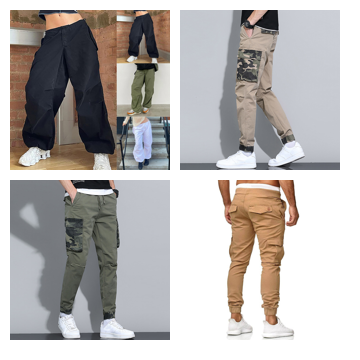

In [79]:
from PIL import Image
import cv2
from rembg import remove
import numpy as np


def is_white_background(image_path, threshold=240, lp=0.7):
    # 读取图片
    image = cv2.imread(image_path)

    # 检查图片是否读取成功
    if image is None:
        print("Error: Image not found.")
        return False

    # 转换为HSV色彩空间，更容易处理颜色
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # 定义白色的HSV范围
    lower_white = np.array([0, 0, threshold], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # 创建掩模
    mask = cv2.inRange(hsv_image, lower_white, upper_white)

    # 计算掩模中白色像素的百分比
    white_percentage = (np.sum(mask) / 255) / (image.shape[0] * image.shape[1])

    # 判断是否为白色背景
    if white_percentage > lp:  # 可以根据实际情况调整这个阈值
        return True
    else:
        return False


def create_image_grid(images, grid_size=(2, 2), gap=10, border=10):
    # 获取单张图片的尺寸
    img_width, img_height = images[0].size
    total_width = (img_width + gap) * grid_size[1] + border * 2
    total_height = (img_height + gap) * grid_size[0] + border * 2

    # 创建空白画布
    new_im = Image.new('RGB', (total_width, total_height), color='white')

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # 计算图片的位置
            x = (img_width + gap) * j + border
            y = (img_height + gap) * i + border
            new_im.paste(images[i * grid_size[1] + j], (x, y))

    return new_im


# 加载四张图片
image_paths = [
    "01.jpg",
    "02.jpg",
    "03.jpg",
    "04.jpg"
]

images = [Image.open(path) for path in image_paths]

# 确保所有图片大小相同
target_size = (160, 160)  # 目标尺寸 (宽度, 高度)
images = [img.resize(target_size) for img in images]

# 设置网格尺寸、空隙大小和边框宽度
grid_size = (2, 2)
gap = 10  # 图片之间的空隙
border = 10  # 边框宽度

# 创建网格
grid_image_src = create_image_grid(images, grid_size, gap, border)

# 显示拼接后的图片
grid_image_src

# # 保存拼接后的图片
# output_path = "output_image.jpg"
# grid_image_src.save(output_path)

In [80]:
new_images = []

for ifp in image_paths:
    # 测试图片路径

    # 检测背景是否为白色
    is_white = is_white_background(ifp)
    if is_white:
        print("The background is mostly white.")
        new_images.append(Image.open(ifp))
    else:
        print("The background is not mostly white.")
        new_image = Image.open(ifp)
        # new_image = remove(new_image, alpha_matting=True, alpha_matting_foreground_threshold=180)
        new_image = remove(new_image)
        bgf = Image.new("RGB", new_image.size, "white")
        bgf.paste(new_image, (0, 0), new_image)
        new_images.append(bgf)

The background is not mostly white.
The background is not mostly white.
The background is not mostly white.
The background is mostly white.


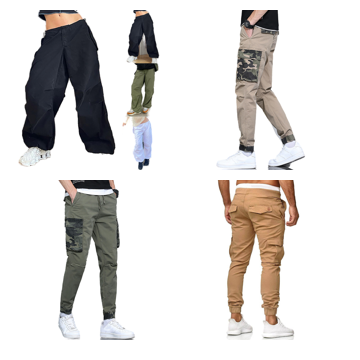

In [81]:
# 确保所有图片大小相同
new_images = [img.resize(target_size) for img in new_images]

# 设置网格尺寸、空隙大小和边框宽度
grid_size = (2, 2)
gap = 10  # 图片之间的空隙
border = 10  # 边框宽度

# 创建网格
grid_image_dst = create_image_grid(new_images, grid_size, gap, border)

# 显示拼接后的图片
grid_image_dst

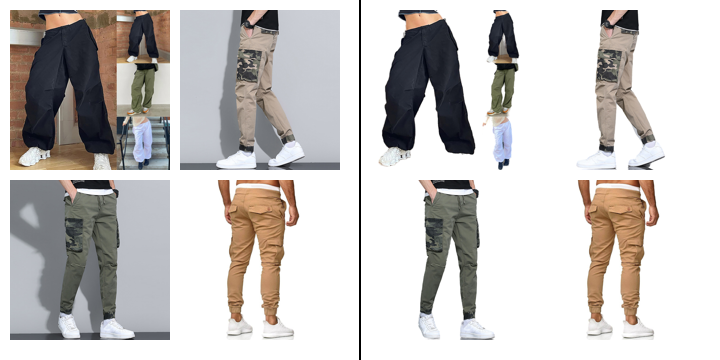

In [82]:
from PIL import Image, ImageDraw


def create_comparison_image(src, dst):
    # 调整图片尺寸，保持高度一致
    max_height = max(src.height, dst.height)

    # 创建一个新的空白画布
    total_width = src.width + dst.width
    new_img = Image.new('RGB', (total_width, max_height), color='white')

    # 粘贴两张图片到新画布上
    new_img.paste(src, (0, 0))
    new_img.paste(dst, (src.width, 0))

    # 在两张图片之间绘制一条分隔线
    draw = ImageDraw.Draw(new_img)
    line_position = src.width - 1
    draw.line([(line_position, 0), (line_position, max_height)], fill='black', width=2)

    return new_img


create_comparison_image(grid_image_src, grid_image_dst)